In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.pipeline as pl
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.linear_model as lm
import sklearn.svm as svm
import sklearn.naive_bayes as nb
import sklearn.cluster as sc

In [6]:
data = pd.read_csv(
    'Earthquakes.csv',
    usecols=['Date(UTC)', 'Latitude', 'Longitude', 'Depth', 'Magnitude'])
data.head()

,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,2018-10-14 15:08:32,36.8578,44.4161,16.97,4.0
1,2018-10-10 09:08:24,37.4341,35.8520,7.02,4.1
2,2018-10-02 15:29:03,37.6878,37.4016,10.27,4.4
3,2018-09-28 00:26:32,37.2003,30.4376,78.07,4.0
4,2018-09-26 02:52:21,35.6846,26.7266,42.77,4.5


In [7]:
data.describe()

,Latitude,Longitude,Depth,Magnitude
count,6574.000000,6574.000000,6574.000000,6574.000000
mean,38.461697,33.084180,24.983027,4.467600
std,1.634089,6.280525,27.758711,0.485719
min,35.670000,25.850000,0.000000,4.000000
25%,36.992250,27.805475,10.000000,4.100000
50%,38.621150,30.159500,13.000000,4.300000
75%,39.565500,39.256775,33.000000,4.700000
max,42.386900,45.149500,212.000000,7.900000


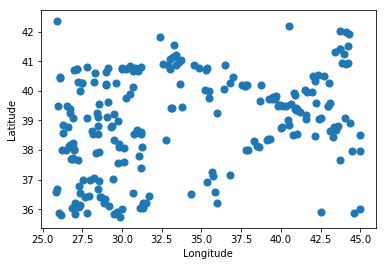

In [15]:
mask = data['Magnitude'] > 5.5
data = data[mask]
data.plot.scatter(x='Longitude', y='Latitude', s=50)

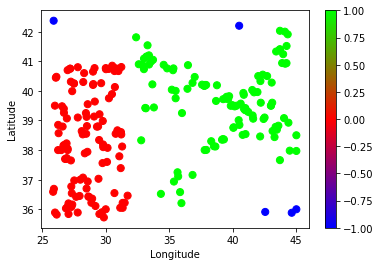

In [24]:
train_data = data[['Latitude', 'Longitude']]
eps = np.arange(0.2, 2.0, 0.1)
for epsilon in eps:
    model = sc.DBSCAN(eps=epsilon, min_samples=5)
    model.fit(train_data)
    labels = model.labels_
    score = sm.silhouette_score(train_data,
                                labels,
                                sample_size=len(train_data),
                                metric='euclidean')
#     print(epsilon, score)

model = sc.DBSCAN(eps=1.3, min_samples=5)
model.fit(train_data)
labels = model.labels_
train_data.plot.scatter('Longitude', 'Latitude', s=50, c=labels, cmap='brg')